# Read in and process experiments

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint

In [20]:
bigN = [2, 5, 10, 20, 50, 100, 200]
deg = list(range(0,21))
deg = list(range(1,21))
sigmas = [0.01, 0.1, 1]
# bigN = [10, 100]
# deg = [4, 20]
# sigmas = [0.01, 0.1, 1]
numCombinations = len(bigN)*len(deg)*len(sigmas)

In [84]:
def plot_report_graph(title, data):
    fig = plt.figure(figsize=(12, 3))
    fig.suptitle(title, fontsize=20)
    for i, entry in enumerate(data):
        data_dict = entry[0]
        x = entry[1]
        x_label = entry[2]
        bottom, top = entry[3]
        
        y_data = []
        y_data.append([[data_dict[n][0] for n in x], "Ein"])
        y_data.append([[data_dict[n][1] for n in x], "Eout"])
        y_data.append([[data_dict[n][2] for n in x], "Ebias"])
        
        plt.subplot(1,3,i+1)
        for entry in y_data:
            y, labl = entry
            plt.plot(x, y, label=labl)
        plt.xlabel(x_label)
        plt.legend(loc="upper left")
        plt.ylim((bottom, top))

    plt.show()

In [85]:
def process_experiments(experiments):
    n_dict, d_dict, sigma_dict = dict(), dict(), dict()
    n_dict_cst, d_dict_cst, sigma_dict_cst = dict(), dict(), dict()
    for exp in experiments:
        n, d, s = exp[0], exp[1], exp[2]

        # Averages over all variables
        n_dict[n] = n_dict.get(n, np.array([0, 0, 0])) + np.array(exp[3:6])
        d_dict[d] = d_dict.get(d, np.array([0, 0, 0])) + np.array(exp[3:6])
        sigma_dict[s] = sigma_dict.get(s, np.array([0, 0, 0])) + np.array(exp[3:6])

        # Holding other variable constant
        if d == 4 and s == 1:
            n_dict_cst[n] = n_dict_cst.get(n, np.array([0, 0, 0])) + np.array(exp[3:6])
        if n == 100 and s == 1:
            d_dict_cst[d] = d_dict_cst.get(d, np.array([0, 0, 0])) + np.array(exp[3:6])
        if n == 20 and d == 20:
            sigma_dict_cst[s] = sigma_dict_cst.get(s, np.array([0, 0, 0])) + np.array(exp[3:6])

    # Average
    n_dict = {k: x/(numCombinations/len(n_dict)) for k, x in n_dict.items()}
    d_dict = {k: x/(numCombinations/len(d_dict)) for k, x in d_dict.items()}
    sigma_dict = {k: x/(numCombinations/len(sigma_dict)) for k, x in sigma_dict.items()}
    return [n_dict, d_dict, sigma_dict, n_dict_cst, d_dict_cst, sigma_dict_cst]

In [86]:
# Read experiment file without reg
with open(".\experiments\experiments_lambd_-1e-05", "r", encoding='utf-8') as f:
    experiments = eval(f.read())
res = process_experiments(experiments) 

with open(".\experiments\experiments_lambd_0", "r", encoding='utf-8') as f:
    experiments = eval(f.read())
res_reg = process_experiments(experiments) 

with open(".\experiments\experiments_lambd_1e-05", "r", encoding='utf-8') as f:
    experiments = eval(f.read())
res_reg_1 = process_experiments(experiments) 


# Results

## Fitting and generalization of our model, in relation to sample size (N), model complexity (d), and noise level (sigma). 
### Averaging combinations of parameters
The plots below show three experiments of our model, each experiment with a different lambda or "weight decay". For each weight decay experiment, we look at the averages of Ein, Eout, and Ebias, in relation to parameters sample size (N), degree (d) and noise level (sigma). For example, in the "Weight Decay=0" experiment, looking at the plot with Sample size (N) on the x-axis, point 50 plots the average of Ein, Eout and Ebias for each parameter combination of d {0,1,...,20}, and sigma {0.01, 0.1, 1}. This gives us a rough overview of the experiments.

As an overview, we find that negative weight decay improves Ein (fitting) and Eout (generalization). We also find that Ein is always lower than Eout, and that Ebias is between Ein and Eout. The errors improve with neg weight decay the because model complexity is not large enough, due to x's being between 0 and 1, when taken to the power these values become smaller and smaller, not bigger and bigger which is what regularization is used for. Negative weight decay ecourages weights to become larger, therefore increasing model complexity and fitting the data better, since the complexity was not high enough.

Comparing Sample size (N) plots, we find Ein (fitting) is best and Eout (generalization) is worst the smaller N is. This makes sense since it is easy to fit a model to only a few datapoints, whether the model complexity is high or not, and whether the noise level is high or not. Conversely, generalization will be very poor with only a few datapoints. Interestingly we find fitting and generalization platue and become equal to each other the bigger N becomes. 

Comparing Complexity (d) plots, we find fitting and generalization and bias are worse the smaller complexity d is. We find the errors generally decreases for Ein Eout and Ebias up until about degree 4, and continue to decrease slightly after degree 4, where Eout is more scattered. Interestingly we find fitting and generalization never meet, whether the complexity is big or small, compared Sample size (N) where fitting and generalization did meet as N got bigger.

Comparing Noise level (sigma) plots, we find the smallest sigma gives the smallest Ein, Eout, and Ebias. This makes sense since increasing the noise will make it harder to fit and generalize the model. Interestly, we find increasing sigma increases all these errors, compared to Sample size (N) which increased but then platued as N got much larger, and compared to Complexity (d) which slightly decreased or stayed overall the same.

When comparing weight decay plots we notice all errors reduce due to negative weight decay in these plots. Going from the plots in experiment "Weight Decay=+1e-05" to "Weight Decay=0" to "Weight Decay=-1e-05", the errors in the Sample size (N) plots at the platue points decrease by 0.5 on the y-axis, the erros in the complexity (d) plots overall decrease by 1 on the y-axis, and the errors in the Noise level (sigma) plots at sigma equal to 1 decrease by 2 on the y-axis.

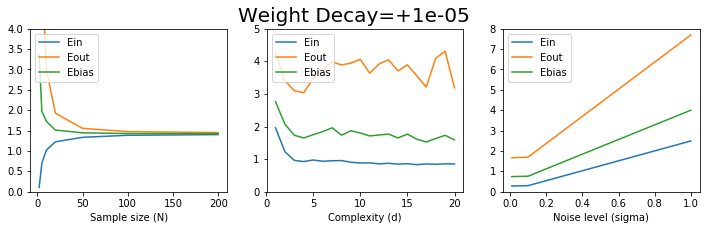

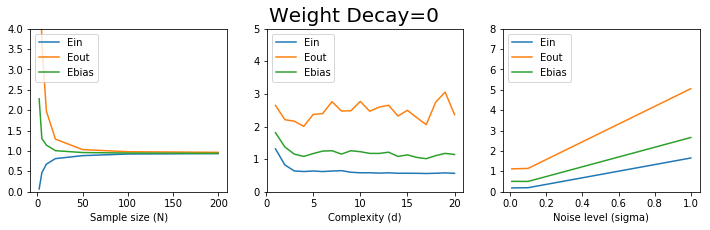

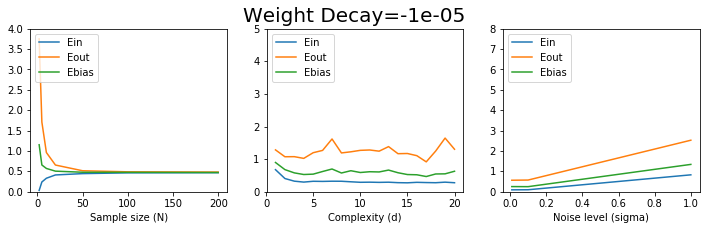

In [96]:
plot_report_graph("Weight Decay=+1e-05", [[res_reg_1[0], bigN, "Sample size (N)", [0,4]], [res_reg_1[1], deg, "Complexity (d)", [0,5]], [res_reg_1[2], sigmas, "Noise level (sigma)", [0,8]]])
plot_report_graph("Weight Decay=0", [[res_reg[0], bigN, "Sample size (N)", [0,4]], [res_reg[1], deg, "Complexity (d)", [0,5]], [res_reg[2], sigmas, "Noise level (sigma)", [0,8]]])
plot_report_graph("Weight Decay=-1e-05", [[res[0], bigN, "Sample size (N)", [0,4]], [res[1], deg, "Complexity (d)", [0,5]], [res[2], sigmas, "Noise level (sigma)", [0,8]]])

## Keeping parameters constant
In the results below, we look at the Ein, Eout, and Ebias, vs parameters sample size (N), degree (d) and noise level (sigma), while keeping 2 parameters constant. For example, given sample size (N) vs Ein, Eout, Ebias, take N = 50 for Ein, this is the value of Ein with sample size 50, d=4, and sigma=0.01, where d and sigma were chosen as the best tradeoff values from the previous results. Holding the rest of the parameters constant allows us to see how Ein, Eout, Ebias changes while only changing one parameter.

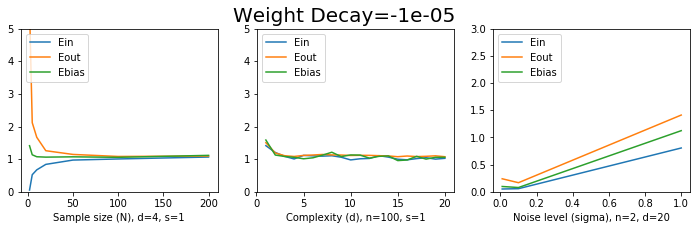

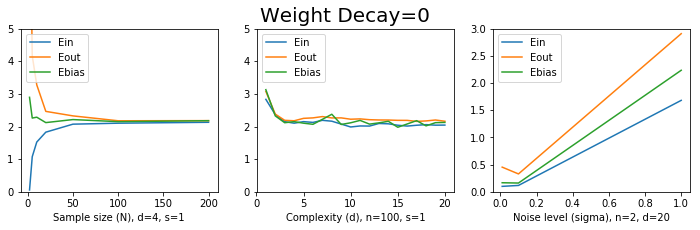

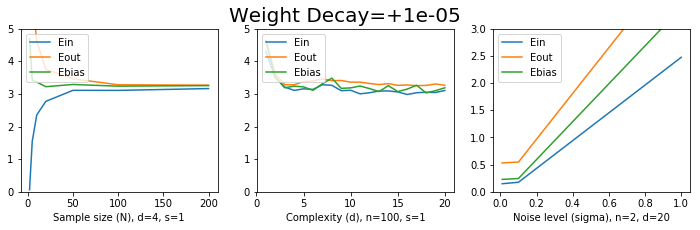

In [92]:
plot_report_graph("Weight Decay=-1e-05", [[res[3], bigN, "Sample size (N), d=4, s=1", [0,5]], [res[4], deg, "Complexity (d), n=100, s=1", [0,5]], [res[5], sigmas, "Noise level (sigma), n=2, d=20", [0,3]]])
plot_report_graph("Weight Decay=0", [[res_reg[3], bigN, "Sample size (N), d=4, s=1", [0,5]], [res_reg[4], deg, "Complexity (d), n=100, s=1", [0,5]], [res_reg[5], sigmas, "Noise level (sigma), n=2, d=20", [0,3]]])
plot_report_graph("Weight Decay=+1e-05", [[res_reg_1[3], bigN, "Sample size (N), d=4, s=1", [0,5]], [res_reg_1[4], deg, "Complexity (d), n=100, s=1", [0,5]], [res_reg_1[5], sigmas, "Noise level (sigma), n=2, d=20", [0,3]]])